In [ ]:
# for DataFrames and manipulations
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

import xgboost as xgb

# removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

seed = 7

In [ ]:
df = pd.read_csv('df_with_missing_values_dropped_50percent.csv')

In [ ]:
df.head(5)

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,D_64_nan
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,NaN,0.005109,0.080204,0.740062,0.132626,0.001436,0.425848,0.538275,0.237232,0.150155,0.060502,0.003083,0.670537,0.001064,0.009852,0.207560,0.647352,0.325464,0.050146,0.007260,0.006510,1.001046,0.004440,0.077352,0.111060,0.755829,0.196520,0.092181,0.002498,0.005720,0.029953,0.068978,0.141639,0.228128,0.042265,0.561116,0.453934,0.009596,0.005605,1.005261,0.007416,0.009710,6.0,0.187413,0.004807,0.846702,0.003347,0.007434,0.006082,0.008649,0.312937,0.000911,0.200894,0.044315,0.003468,0.006486,0.009681,0.008714,0.003488,0.417256,0.009573,0.000013,0.008737,0.003418,0.008551,0.005027,0.207844,0.004827,0.008204,0.002737,0.001271,0.007090,1.001785,0.098844,0.009521,0.003492,0.004815,0.009732,0.004530,0.008460,0.0,0.007482,0.003417,0.004134,0.007100,1,0.000869,0.002693,0.008749,0.004063,0.005139,0.007752,1.004296,0.000888,0.000684,0.000934,1.007865,0.004344,0.004264,0.007412,0.004308,0.006280,0.005712,0.933347,0.136322,0.950119,0.979136,0.003096,0.922532,1.003984,1.015417,0.670781,0.009383,0.018704,1.003859,2.0,0.003869,1.002848,0.100918,0.979416,0.005959,1.0,0.256733,0.0,4.0,0.253851,0.247433,0.0,0.719052,0.434562,0.001219,0.689587,0.009668,1.0,1.007528,0.999822,1.004776,0.006563,0.009851,0.004304,0.000122,0.007725,0.001563,0.001976,0.002569,0.001098,0.006346,0.004204,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-03-01,0.929122,0.382790,0.025782,1.002647,0.005515,0.089799,0.001479,0.005830,NaN,0.009873,0.021776,0.239459,0.070967,0.008058,0.457826,0.382562,0.059342,0.201574,0.032390,0.007684,0.334386,0.007561,0.005552,0.110471,0.619012,0.302757,0.025802,0.011677,0.003243,1.009099,0.001485,0.072583,0.026337,0.596242,0.052813,0.036490,0.004105,0.007069,0.015918,0.230700,0.375191,0.063612,0.005119,0.281806,0.239244,0.007912,0.174382,1.008107,0.001015,0.002688,6.0,0.175123,0.000396,0.282619,0.006760,0.006521,0.007803,0.001396,0.015735,0.002945,0.200131,0.014834,0.004637,0.000560,0.000939,0.000798,0.000963,0.222324,0.027022,0.005833,0.002569,0.000223,0.009420,0.001228,0.008212,0.000954,0.008326,0.002704,0.002767,0.000797,1.002751,0.020552,0.007203,0.002874,0.001399,0.003912,0.004593,0.004460,0.0,0.003757,0.002582,0.007083,0.004040,1,0.002157,0.009864,0.005578,0.008184,NaN,0.003199,1.006756,0.009185,0.000482,0.004166,0.007530,0.000142,0.005410,0.008460,0.001500,0.004736,0.001770,0.914921,0.135440,0.926104,0.976465,0.006042,0.001040,0.007944,0.007099,0.007600,0.005126,0.023904,1.003868,2.0,0.009713,1.008423,0.030687,NaN,0.005897,1.0,0.430118,0.0,-1.0,0.418370,0.416349,0.0,0.527146,0.292568,0.009932,0.137895,0.009582,1.0,0.008318,1.002662,0.003712,0.002124,0.002148,0.003912,0.001289,0.003198,0.003776,0.001808,0.008200,0.001061,0.000027,0.002629,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2017-09-11,0.904482,0.005470,0.006262,0.818312,0.005699,NaN,0.009560,0.009063,NaN,0.003950,0.034588,0.241658,0.008656,0.0

In [ ]:
df1 = df.drop('Unnamed: 0', axis=1)

In [ ]:
df1.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,D_64_nan
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,NaN,0.005109,0.080204,0.740062,0.132626,0.001436,0.425848,0.538275,0.237232,0.150155,0.060502,0.003083,0.670537,0.001064,0.009852,0.207560,0.647352,0.325464,0.050146,0.007260,0.006510,1.001046,0.004440,0.077352,0.111060,0.755829,0.196520,0.092181,0.002498,0.005720,0.029953,0.068978,0.141639,0.228128,0.042265,0.561116,0.453934,0.009596,0.005605,1.005261,0.007416,0.009710,6.0,0.187413,0.004807,0.846702,0.003347,0.007434,0.006082,0.008649,0.312937,0.000911,0.200894,0.044315,0.003468,0.006486,0.009681,0.008714,0.003488,0.417256,0.009573,0.000013,0.008737,0.003418,0.008551,0.005027,0.207844,0.004827,0.008204,0.002737,0.001271,0.007090,1.001785,0.098844,0.009521,0.003492,0.004815,0.009732,0.004530,0.008460,0.0,0.007482,0.003417,0.004134,0.007100,1,0.000869,0.002693,0.008749,0.004063,0.005139,0.007752,1.004296,0.000888,0.000684,0.000934,1.007865,0.004344,0.004264,0.007412,0.004308,0.006280,0.005712,0.933347,0.136322,0.950119,0.979136,0.003096,0.922532,1.003984,1.015417,0.670781,0.009383,0.018704,1.003859,2.0,0.003869,1.002848,0.100918,0.979416,0.005959,1.0,0.256733,0.0,4.0,0.253851,0.247433,0.0,0.719052,0.434562,0.001219,0.689587,0.009668,1.0,1.007528,0.999822,1.004776,0.006563,0.009851,0.004304,0.000122,0.007725,0.001563,0.001976,0.002569,0.001098,0.006346,0.004204,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-03-01,0.929122,0.382790,0.025782,1.002647,0.005515,0.089799,0.001479,0.005830,NaN,0.009873,0.021776,0.239459,0.070967,0.008058,0.457826,0.382562,0.059342,0.201574,0.032390,0.007684,0.334386,0.007561,0.005552,0.110471,0.619012,0.302757,0.025802,0.011677,0.003243,1.009099,0.001485,0.072583,0.026337,0.596242,0.052813,0.036490,0.004105,0.007069,0.015918,0.230700,0.375191,0.063612,0.005119,0.281806,0.239244,0.007912,0.174382,1.008107,0.001015,0.002688,6.0,0.175123,0.000396,0.282619,0.006760,0.006521,0.007803,0.001396,0.015735,0.002945,0.200131,0.014834,0.004637,0.000560,0.000939,0.000798,0.000963,0.222324,0.027022,0.005833,0.002569,0.000223,0.009420,0.001228,0.008212,0.000954,0.008326,0.002704,0.002767,0.000797,1.002751,0.020552,0.007203,0.002874,0.001399,0.003912,0.004593,0.004460,0.0,0.003757,0.002582,0.007083,0.004040,1,0.002157,0.009864,0.005578,0.008184,NaN,0.003199,1.006756,0.009185,0.000482,0.004166,0.007530,0.000142,0.005410,0.008460,0.001500,0.004736,0.001770,0.914921,0.135440,0.926104,0.976465,0.006042,0.001040,0.007944,0.007099,0.007600,0.005126,0.023904,1.003868,2.0,0.009713,1.008423,0.030687,NaN,0.005897,1.0,0.430118,0.0,-1.0,0.418370,0.416349,0.0,0.527146,0.292568,0.009932,0.137895,0.009582,1.0,0.008318,1.002662,0.003712,0.002124,0.002148,0.003912,0.001289,0.003198,0.003776,0.001808,0.008200,0.001061,0.000027,0.002629,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2017-09-11,0.904482,0.005470,0.006262,0.818312,0.005699,NaN,0.009560,0.009063,NaN,0.003950,0.034588,0.241658,0.008656,0.001342,0.423163,0.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Columns: 170 entries, customer_ID to D_64_nan
dtypes: float64(166), int64(2), object(2)
memory usage: 595.2+ MB


# Train-Test Split #

In [ ]:
# define the train, test1, and test2 date ranges
# we split the sample set this way in order for our model to learn the effects of different seasons / time periods
train_start_date = '2017-05-01'
train_end_date = '2018-01-31'
test1_start_date = '2017-03-01'
test1_end_date = '2017-04-30'
test2_start_date = '2018-02-01'
test2_end_date = '2018-03-31'

# split the data into train, test1, and test2 samples based on the date ranges
train = df1[(df1['S_2'] >= train_start_date) & (df1['S_2'] <= train_end_date)]
test1 = df1[(df1['S_2'] >= test1_start_date) & (df1['S_2'] <= test1_end_date)]
test2 = df1[(df1['S_2'] >= test2_start_date) & (df1['S_2'] <= test2_end_date)]
xtrain = train.drop(['target', 'customer_ID', 'S_2'], axis=1)
ytrain = train['target']


#### Compare test and train samples to make sure they are not fundamentally different ####

* Because of the seasonal nature of our data set, we will accept the slight differences in the default rate for our samples.
* Track the level of variance and asses if it is still sensible for a non-overfitted model.

In [ ]:
# calculate default rate for each time period
# we see that train and test samples are not fundamentally different
print('Default rate for time period 2017-05-01 to 2018-01-31: ', sum(train["target"])/len(train["target"]))
print('Default rate for time period 2017-03-01 to 2017-04-30: ', sum(test1["target"])/len(test1["target"]))
print('Default rate for time period 2018-02-01 to 2018-03-31: ', sum(test2["target"])/len(test2["target"]))

Default rate for time period 2017-05-01 to 2018-01-31:  0.2579734203111879
Default rate for time period 2017-03-01 to 2017-04-30:  0.23518307567127747
Default rate for time period 2018-02-01 to 2018-03-31:  0.27865261928295443


In [ ]:
xgb_instance = xgb.XGBClassifier(random_state = seed) # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.
model_for_feature_selection = xgb_instance.fit(xtrain, ytrain)

feature_importance = {'Feature':xtrain.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

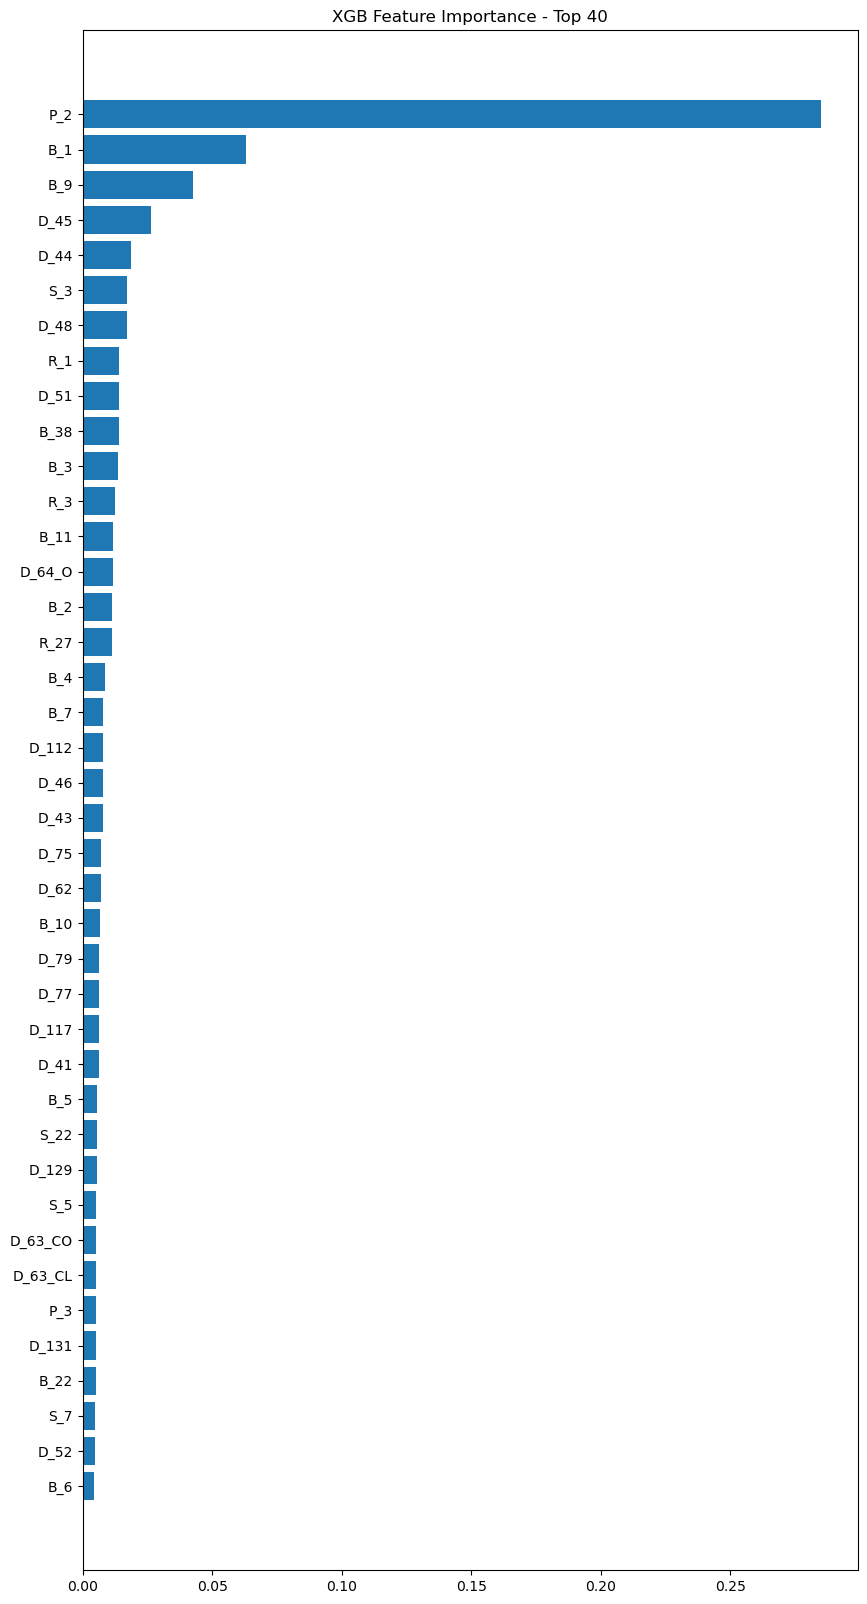

In [ ]:
# for data Visualization
import matplotlib.pyplot as plt

num_features = 40
plt.figure(figsize=(10,5*num_features//10))
plt.barh(np.arange(num_features,0,-1), feature_importance['Importance'].values[:num_features])
plt.yticks(np.arange(num_features,0,-1), feature_importance['Feature'].values[:num_features])
plt.title(f'XGB Feature Importance - Top {num_features}')
plt.show()

In [ ]:
# choose features with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]
final_features

0          P_2
2          B_1
21         B_9
11        D_45
9         D_44
5          S_3
16        D_48
4          R_1
20        D_51
123       B_38
7          B_3
22         R_3
27        B_11
163     D_64_O
3          B_2
122       R_27
10         B_4
18         B_7
125      D_112
14        D_46
8         D_43
64        D_75
44        D_62
25        B_10
71        D_79
67        D_77
132      D_117
6         D_41
12         B_5
111       S_22
144      D_129
26         S_5
157    D_63_CO
156    D_63_CL
24         P_3
147      D_131
Name: Feature, dtype: object

In [ ]:
final_features.to_csv('final_features_missing_values_dropped.csv')
feature_importance.to_csv('feature_importance_wo_params_missing_values_dropped.csv')

In [ ]:
# run xgboost with parameters
# define xgboost hyperparameters
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "learning_rate": 0.5,
    "max_depth": 4,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "scale_pos_weight": 5
}


# train xgboost model
xgb_instance = xgb.XGBClassifier(**params, random_state = seed)
model_for_feature_impotance_with_params = xgb_instance.fit(xtrain, ytrain)

In [ ]:
feature_importance_with_params = {'Feature':xtrain.columns,'Importance':model_for_feature_impotance_with_params.feature_importances_}
feature_importance_with_params = pd.DataFrame(feature_importance_with_params)
feature_importance_with_params.sort_values("Importance", inplace=True,ascending=False)
feature_importance_with_params

,Feature,Importance
0,P_2,0.175791
163,D_64_O,0.064388
2,B_1,0.039769
18,B_7,0.024267
11,D_45,0.018501
20,D_51,0.017783
31,S_7,0.017070
7,B_3,0.015726
61,B_23,0.011685
156,D_63_CL,0.011437


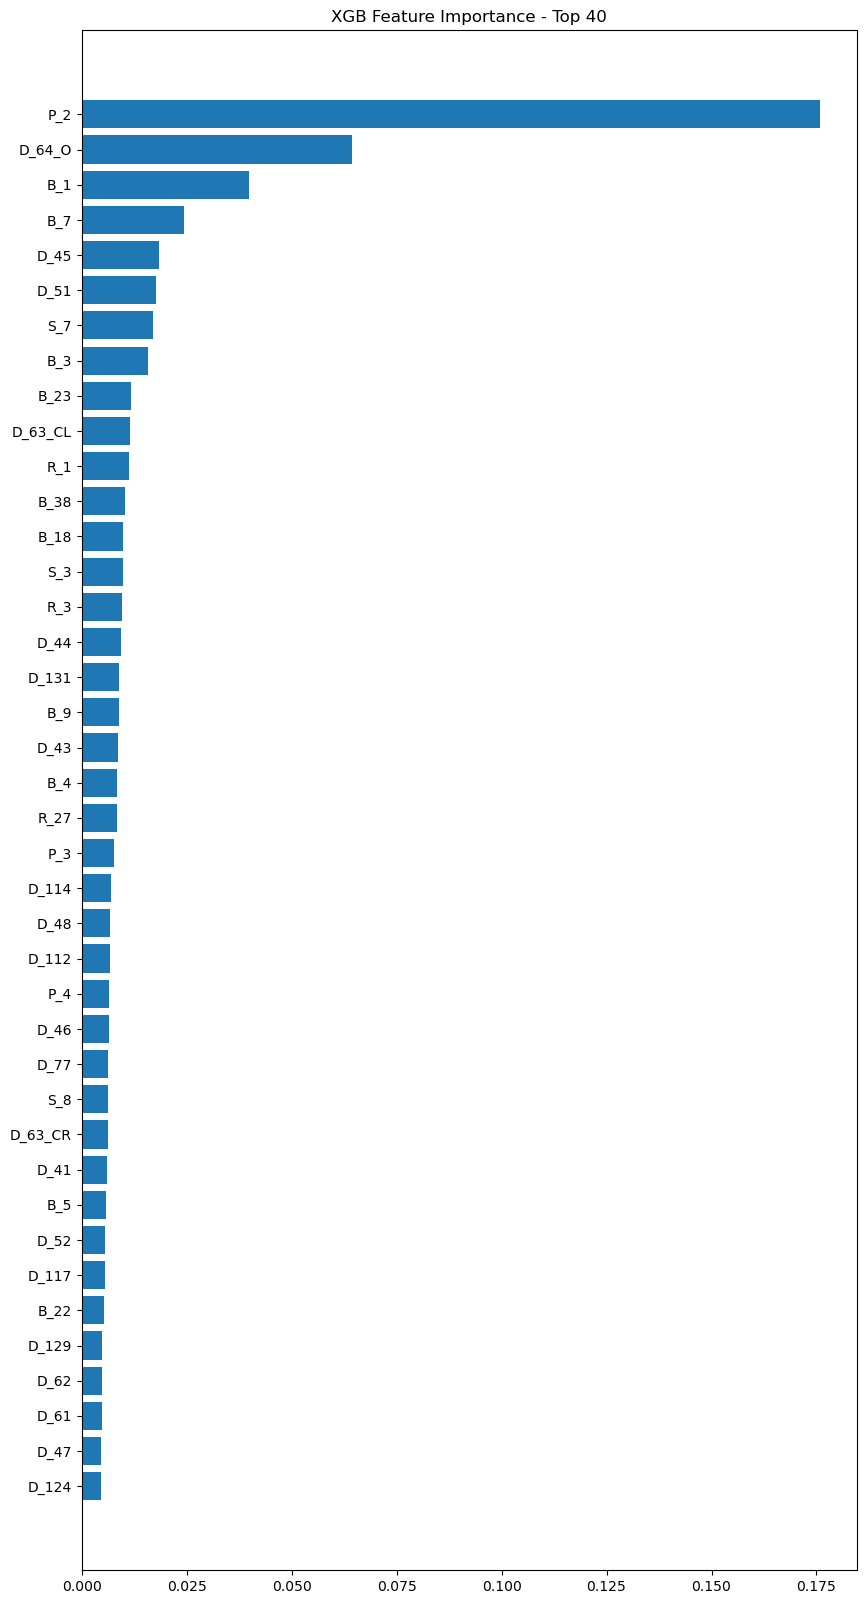

In [ ]:
# for data Visualization
import matplotlib.pyplot as plt

num_features = 40
plt.figure(figsize=(10,5*num_features//10))
plt.barh(np.arange(num_features,0,-1), feature_importance_with_params['Importance'].values[:num_features])
plt.yticks(np.arange(num_features,0,-1), feature_importance_with_params['Feature'].values[:num_features])
plt.title(f'XGB Feature Importance - Top {num_features}')
plt.show()

In [ ]:
final_features_with_params = feature_importance_with_params["Feature"][feature_importance_with_params.Importance > 0.005]

In [ ]:
final_features_with_params

0          P_2
163     D_64_O
2          B_1
18         B_7
11        D_45
20        D_51
31         S_7
7          B_3
61        B_23
156    D_63_CL
4          R_1
123       B_38
47        B_18
5          S_3
22         R_3
9         D_44
147      D_131
21         B_9
8         D_43
10         B_4
122       R_27
24         P_3
129      D_114
16        D_48
125      D_112
62         P_4
14        D_46
67        D_77
33         S_8
158    D_63_CR
6         D_41
12         B_5
23        D_52
132      D_117
56        B_22
Name: Feature, dtype: object

In [ ]:
final_features_with_params.to_csv('final_features_with_params_missing_values_dropped.csv')
feature_importance_with_params.to_csv('feature_importance_with_params_missing_values_dropped.csv')

In [ ]:
final_features.info()

<class 'pandas.core.series.Series'>
Int64Index: 36 entries, 0 to 147
Series name: Feature
Non-Null Count  Dtype 
--------------  ----- 
36 non-null     object
dtypes: object(1)
memory usage: 576.0+ bytes


In [ ]:
final_features_with_params.info()

<class 'pandas.core.series.Series'>
Int64Index: 35 entries, 0 to 56
Series name: Feature
Non-Null Count  Dtype 
--------------  ----- 
35 non-null     object
dtypes: object(1)
memory usage: 560.0+ bytes


In [ ]:
merged_features = pd.merge(final_features, final_features_with_params)

In [ ]:
merged_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Feature  26 non-null     object
dtypes: object(1)
memory usage: 416.0+ bytes


In [ ]:
merged_features = merged_features['Feature'].tolist()

In [ ]:
merged_features

['P_2',
 'B_1',
 'B_9',
 'D_45',
 'D_44',
 'S_3',
 'D_48',
 'R_1',
 'D_51',
 'B_38',
 'B_3',
 'R_3',
 'D_64_O',
 'R_27',
 'B_4',
 'B_7',
 'D_112',
 'D_46',
 'D_43',
 'D_77',
 'D_117',
 'D_41',
 'B_5',
 'D_63_CL',
 'P_3',
 'D_131']

In [ ]:
X_train = xtrain[merged_features]

In [ ]:
Y_train = ytrain

In [ ]:
X_train.isna().mean()*100

P_2         1.165253
B_1         0.000000
B_9         0.000000
D_45        0.081704
D_44        5.209593
S_3        18.201802
D_48       13.185445
R_1         0.000000
D_51        0.000000
B_38        0.081380
B_3         0.081380
R_3         0.000000
D_64_O      0.000000
R_27        2.803869
B_4         0.000000
B_7         0.000000
D_112       0.095321
D_46       24.264098
D_43       31.477056
D_77       44.891402
D_117       5.413853
D_41        0.081380
B_5         0.000000
D_63_CL     0.000000
P_3         8.325039
D_131       3.053519
dtype: float64

In [ ]:
# features selected for test1 and test2
xtest1 = test1[merged_features]
xtest2 = test2[merged_features]

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test1 set : ", xtest1.shape)
print("Shape of test2 set : ", xtest2.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test1 set:")
print(test1['target'].value_counts(normalize=True))
print("Percentage of classes in test2 set:")
print(test2['target'].value_counts(normalize=True))

Shape of Training set :  (308431, 26)
Shape of test1 set :  (61450, 26)
Shape of test2 set :  (89032, 26)
Percentage of classes in training set:
0    0.742027
1    0.257973
Name: target, dtype: float64
Percentage of classes in test1 set:
0    0.764817
1    0.235183
Name: target, dtype: float64
Percentage of classes in test2 set:
0    0.721347
1    0.278653
Name: target, dtype: float64


# Grid Search #

## Model evaluation criterion ##

* We want to predict which customers will default.

### Model can make wrong predictions as:

1. Model predicts that the a customer will default but in reality, the customer will not default and should be accepted for a credit line.
2. Model predicts that the a customer will not default but in reality, the customer will default and should be rejected for a credit line.

### Which case is more important? ###

* Both cases are important in maximizing expected revenues for AMEX. There is a tradeoff in both errors. We will implement two strategies where one is conservative with a lower threshold approved and another is aggressive with a higher threshold approved.
* If a credit line is approved when it had to be rejected, then no revenue is expected from the customer.
* If a credit line is not approved when it had to be approved, then there is opportunity cost missed.

### How to reduce the losses? ###
* F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model. ####
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# let's use hyoerparameter tuning and look at AUC as one of the performance matrix

table = pd.DataFrame(columns = ["Num Trees", "Learning Rate", "Subsample", "% Features", "Weight of Default", "AUC Train", "AUC Test 1", "AUC Test 2"])

row = 0
for num_trees in [50, 100, 300]:
  for lr in [0.01, 0.1]:
    for perc_obs in [0.5, 0.8]:
        for perc_features in [0.5, 1.0]:
            for scale_weight in [1, 5, 10]:        
                xgb_instance3 = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = lr, subsample=perc_obs, colsample_bytree=perc_features, scale_pos_weight=scale_weight, random_state=seed)
                model_grid = xgb_instance3.fit(X_train, Y_train)

                table.loc[row,"Num Trees"] = num_trees
                table.loc[row,"Learning Rate"] = lr
                table.loc[row,"Subsample"] = perc_obs
                table.loc[row,"% Features"] = perc_features
                table.loc[row,"Weight of Default"] = scale_weight
                table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model_grid.predict_proba(X_train)[:,1])
                table.loc[row,"AUC Test 1"] = roc_auc_score(test1['target'], model_grid.predict_proba(xtest1)[:,1])
                table.loc[row,"AUC Test 2"] = roc_auc_score(test2['target'], model_grid.predict_proba(xtest2)[:,1])

                row = row + 1

table

,Num Trees,Learning Rate,Subsample,% Features,Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,0.5,0.5,1,0.923997,0.907722,0.932008
1,50,0.01,0.5,0.5,5,0.922812,0.907287,0.93035
2,50,0.01,0.5,0.5,10,0.92164,0.906422,0.928873
3,50,0.01,0.5,1.0,1,0.920335,0.903509,0.927277
4,50,0.01,0.5,1.0,5,0.918573,0.902391,0.925274
5,50,0.01,0.5,1.0,10,0.916805,0.900977,0.923331
6,50,0.01,0.8,0.5,1,0.923987,0.907724,0.931879
7,50,0.01,0.8,0.5,5,0.922857,0.907111,0.930288
8,50,0.01,0.8,0.5,10,0.921686,0.906356,0.928902
9,50,0.01,0.8,1.0,1,0.919913,0.902943,0.926572


In [ ]:
table.to_csv('parameters_xgb_missing_values_dropped_50percent.csv')

### Final Model ###

#### Fit chosen model on training, test1 and test2 sets ####

In [ ]:
# see parameters here and let me know what you think
final_model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1, scale_pos_weight=5, random_state=seed)

# fit training
model_xgb_train = final_model_xgb.fit(X_train, Y_train)
probs_xgb_train = model_xgb_train.predict_proba(X_train)[:,1]

# fit test1
model_xgb_test1 = final_model_xgb.fit(xtest1, test1['target'])
probs_xgb_test1 = model_xgb_test1.predict_proba(xtest1)[:,1]

# fit test2
model_xgb_test2 = final_model_xgb.fit(xtest2, test2['target'])
probs_xgb_test2 = model_xgb_test2.predict_proba(xtest2)[:,1]

#### Important features in the final model ####

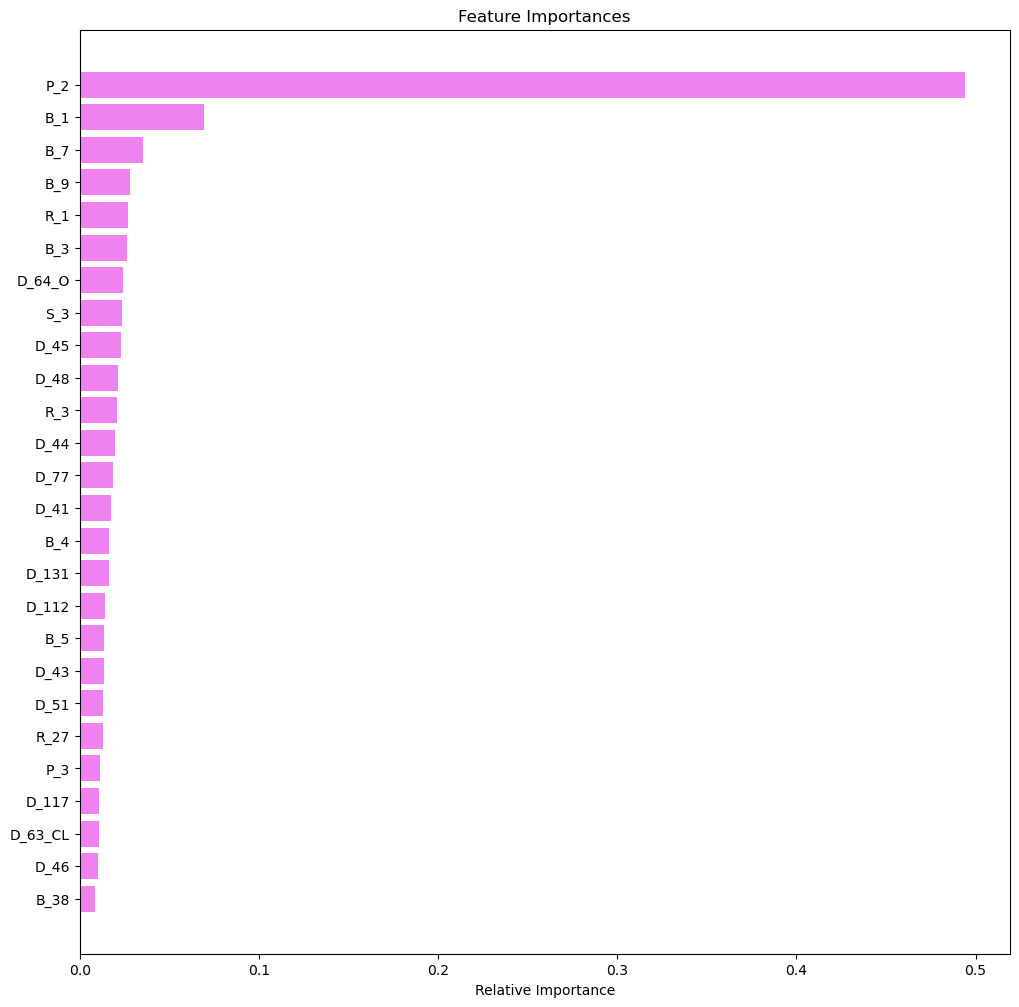

In [ ]:
feature_names = X_train.columns
importances = final_model_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Plot ROC Curve ####

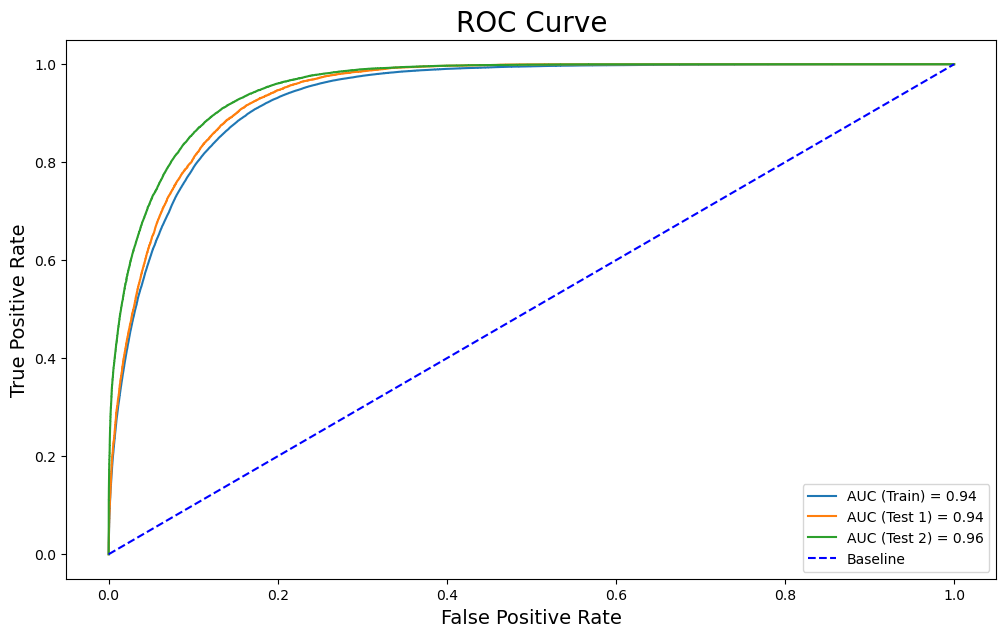

In [ ]:
auc_xgb_train = roc_auc_score(Y_train, probs_xgb_train)
fpr_xgb_train, tpr_xgb_train, thresholds_xgb_train = roc_curve(Y_train, probs_xgb_train)

auc_xgb_test1 = roc_auc_score(test1['target'], probs_xgb_test1)
fpr_xgb_test1, tpr_xgb_test1, thresholds_xgb_test1 = roc_curve(test1['target'], probs_xgb_test1)

auc_xgb_test2 = roc_auc_score(test2['target'], probs_xgb_test2)
fpr_xgb_test2, tpr_xgb_test2, thresholds_xgb_test2 = roc_curve(test2['target'], probs_xgb_test2)

plt.figure(figsize=(12, 7))
plt.plot(fpr_xgb_train, tpr_xgb_train, label=f'AUC (Train) = {auc_xgb_train:.2f}')
plt.plot(fpr_xgb_test1, tpr_xgb_test1, label=f'AUC (Test 1) = {auc_xgb_test1:.2f}')
plt.plot(fpr_xgb_test2, tpr_xgb_test2, label=f'AUC (Test 2) = {auc_xgb_test2:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#### Checking model performance on training set ####

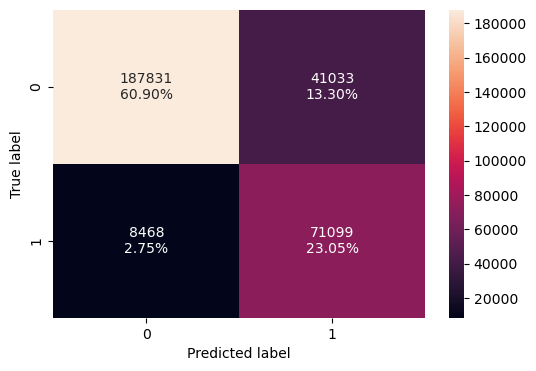

In [ ]:
confusion_matrix_sklearn(final_model_xgb, X_train, Y_train)

In [ ]:
xgbmodel_train_perf = model_performance_classification_sklearn(final_model_xgb, X_train, Y_train)
xgbmodel_train_perf

,Accuracy,Recall,Precision,F1
0,0.839507,0.893574,0.634065,0.741777


#### Checking model performance on test1 set ####

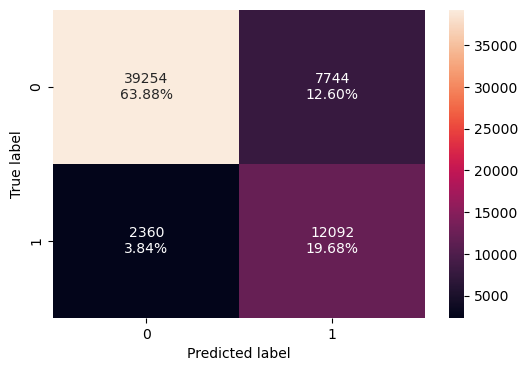

In [ ]:
confusion_matrix_sklearn(final_model_xgb, xtest1, test1['target'])

In [ ]:
xgbmodel_test1_perf = model_performance_classification_sklearn(final_model_xgb, xtest1, test1['target'])
xgbmodel_test1_perf

,Accuracy,Recall,Precision,F1
0,0.835574,0.836701,0.609599,0.70532


#### Checking model performance on test2 set ####

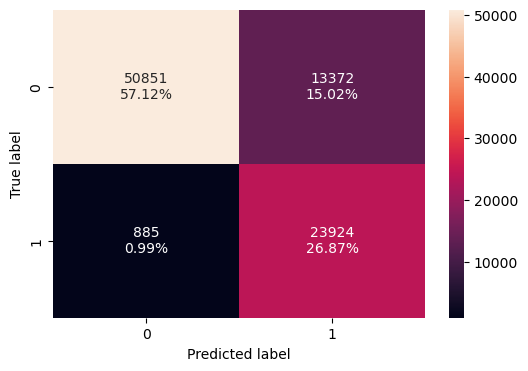

In [ ]:
confusion_matrix_sklearn(final_model_xgb, xtest2, test2['target'])

In [ ]:
xgbmodel_test2_perf = model_performance_classification_sklearn(final_model_xgb, xtest2, test2['target'])
xgbmodel_test2_perf

,Accuracy,Recall,Precision,F1
0,0.839867,0.964327,0.641463,0.770437
